In [27]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sym
from scipy import integrate
from tqdm import tqdm
sym.init_printing(use_unicode=True)

In [28]:
def f(x):
    return x**2 + 10*np.sin(x)
    #return (x-1)**2

In [29]:
def Gradient(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [30]:
l = np.linspace(-1,2,40)
F = f(l)

In [31]:
#plt.plot(l,F)

In [49]:
def Minimizer(f,N=200,gamma=0.0001):
    
    r = np.zeros(N)
    
    r[0] = np.random.uniform(-1,0)
    #print(r)
    
    for i in tqdm(range(1,N)):
        
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1])
        
    return r

In [50]:
x = Minimizer(f)

100%|█████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 292968.23it/s]


In [51]:
#x

<IPython.core.display.Javascript object>


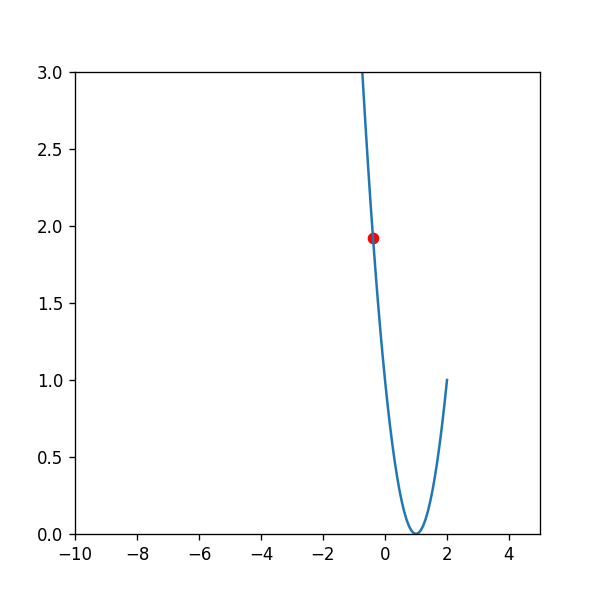

In [52]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    
    ax.set_xlim(-10,5)
    ax.set_ylim(0,3)
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.plot(l,F)
    plot = ax.scatter(x[i],f(x[i]),color='r')
    
    return plot

Animation = animation.FuncAnimation(fig, Update, frames = len(x), init_func=init)